In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_excel("./data/OCR_verified.xlsx")

In [13]:
data.head()

,Erro,Nº DODF,DATA DODOF,COMPLEMENTO,Nº BLOCO,SEÇÃO,SEC,SUB_SEC1,SUB_SEC2,SUB_SEC3,...,Nº LINHAS,Nº LINHAS SECAO,Nº LINHAS SEC,Nº LINHAS SUB_SEC1,Nº LINHAS SUB_SEC2,Nº LINHAS SUB_SEC3,Nº LINHAS TIT BLOCO,Nº LINHAS SUBT BLOCO,Nº LINHAS DEMAIS SUBT BLOCO,Nº LINHAS TOTAIS
0,1.0,1.0,01-01-2019,EDICAO ESPECIAL,1.0,SEÇÃO II,PODER EXECUTIVO,NaN,NaN,NaN,...,88.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,91.0
1,1.0,1.0,02-01-2019,INTEGRA,1.0,SEÇÃO II,PODER EXECUTIVO,NaN,NaN,NaN,...,16.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,19.0
2,1.0,1.0,02-01-2019,INTEGRA,2.0,SEÇÃO III,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...",COMPANHIA IMOBILIÁRIA DE BRASÍLIA,AGÊNCIA DE DESENVOLVIMENTO DO DISTRITO FEDERAL,COMISSÃO DE VENDA DIRETA,...,16.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,25.0
3,1.0,1.0,02-01-2019,INTEGRA,3.0,SEÇÃO III,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...",COMPANHIA IMOBILIÁRIA DE BRASÍLIA,AGÊNCIA DE DESENVOLVIMENTO DO DISTRITO FEDERAL,COMISSÃO DE VENDA DIRETA,...,28.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,30.0
4,1.0,1.0,02-01-2019,INTEGRA,4.0,SEÇÃO III,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...",COMPANHIA IMOBILIÁRIA DE BRASÍLIA,AGÊNCIA DE DESENVOLVIMENTO DO DISTRITO FEDERAL,COMISSÃO DE VENDA DIRETA,...,52.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,54.0


In [9]:
data.columns

Index(['Erro', 'Nº DODF', 'DATA DODOF', 'COMPLEMENTO', 'Nº BLOCO', 'SEÇÃO',
       'SEC', 'SUB_SEC1', 'SUB_SEC2', 'SUB_SEC3', 'TIT BLOCO', 'SUBT BLOCO',
       'DEMAIS SUBT BLOCO', 'TEXTO BLOCO', 'INICIO BLOCO', 'FIM BLOCO',
       'PAG INICIO BLOCO', 'LINHA INICIO BLOCO', 'PAG FIM BLOCO',
       'LINHA FIM BLOCO', 'Nº LINHAS', 'Nº LINHAS SECAO', 'Nº LINHAS SEC',
       'Nº LINHAS  SUB_SEC1', 'Nº LINHAS SUB_SEC2', 'Nº LINHAS SUB_SEC3',
       'Nº LINHAS TIT BLOCO', 'Nº LINHAS SUBT BLOCO',
       'Nº LINHAS DEMAIS SUBT BLOCO', 'Nº LINHAS TOTAIS'],
      dtype='object')

In [15]:
data_clean = data[["Erro", "SEC", "TEXTO BLOCO", "Nº LINHAS TOTAIS"]]; data_clean.head()

,Erro,SEC,TEXTO BLOCO,Nº LINHAS TOTAIS
0,1.0,PODER EXECUTIVO,"O GOVERNADOR DO DISTRITO FEDERAL, NO USO DE SU...",91.0
1,1.0,PODER EXECUTIVO,"O GOVERNADOR DO DISTRITO FEDERAL, no uso das a...",19.0
2,1.0,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...","O Presidente da COVED, acolhendo os pareceres ...",25.0
3,1.0,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...","O Presidente da COVED, acolhendo o parecer ins...",30.0
4,1.0,"SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIME...","O Presidente da COVED, acolhendo os pareceres ...",54.0


In [25]:
len(data[data["Erro"] == 1]) / len(data[data["Erro"] >= 1])

0.9084065244667503

In [26]:
data["Erro"].value_counts()

1.0    724
2.0     64
3.0      9
Name: Erro, dtype: int64

In [33]:
data["Nº LINHAS TOTAIS"].value_counts()

10.0      331
9.0       278
11.0      249
12.0      177
13.0      153
         ... 
528.0       1
236.0       1
244.0       1
98.0        1
2280.0      1
Name: Nº LINHAS TOTAIS, Length: 182, dtype: int64

In [36]:
data["Nº LINHAS TOTAIS"].describe()

count    2650.000000
mean       36.953585
std       154.633489
min         4.000000
25%        10.000000
50%        14.000000
75%        21.000000
max      3450.000000
Name: Nº LINHAS TOTAIS, dtype: float64

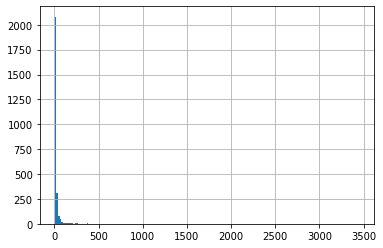

In [35]:
hist = data["Nº LINHAS TOTAIS"].hist(bins=182)

In [48]:
secs = data[data["Erro"] == 1]["SEC"].unique(); len(secs)

25

In [50]:
secs

array(['PODER EXECUTIVO',
       'SECRETARIA DE ESTADO DE ECONOMIA, DESENVOLVIMENTO, INOVAÇÃO, CIÊNCIA E TECNOLOGIA',
       'SECRETARIA DE ESTADO DA CASA CIVIL, RELAÇÕES INSTITUCIONAIS E SOCIAIS',
       'SECRETARIA DE ESTADO DE EDUCAÇÃO',
       'SECRETARIA DE ESTADO DA SEGURANÇA PÚBLICA', 'PODER LEGISLATIVO',
       'SECRETARIA DE ESTADO DA CASA CIVIL',
       'SECRETARIA DE ESTADO DE SAÚDE',
       'SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE',
       'SECRETARIA DE ESTADO DE JUSTIÇA E CIDADANIA',
       'SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA',
       'SECRETARIA DE ESTADO DE TURISMO',
       'SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA',
       'DEFENSORIA PÚBLICA DO DISTRITO FEDERAL',
       'TRIBUNAL DE CONTAS DO DISTRITO FEDERAL',
       'SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO',
       'SECRETARIA DE ESTADO DE AGRICULTURA, ABASTECIMENTO E DESENVOLVIMENTO RURAL',
       'SECRETARIA DE ESTADO DE DESENVOLVIMENTO URBANO E HABITAÇÃO',
       'CA

In [51]:
data[data["Erro"] == 1]["SEC"].value_counts()

SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA                                            152
SECRETARIA DE ESTADO DE SAÚDE                                                         97
SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO                     63
SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE                                       60
CASA CIVIL                                                                            56
SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA                                        56
SECRETARIA DE ESTADO DE EDUCAÇÃO                                                      40
SECRETARIA DE ESTADO DE CULTURA                                                       40
TRIBUNAL DE CONTAS DO DISTRITO FEDERAL                                                32
PODER EXECUTIVO                                                                       31
DEFENSORIA PÚBLICA DO DISTRITO FEDERAL                                                23
SECRETARIA DE ESTADO 

In [3]:
data = pd.read_csv("data/clean/train.csv")

In [4]:
data.head()

,label,text,is_valid
0,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,False
1,SECRETARIA DE ESTADO DE CULTURA,PROCESSO: 00150-00010629/2018-72; NOTA DE EMPE...,False
2,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,False
3,"SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO,...",A Comissão Permanente de Licitação do BRB - BA...,False
4,CASA CIVIL,A ADMINISTRADORA REGIONAL DE TAGUATINGA DO DIS...,False


In [7]:
df_test = data[data["is_valid"]]

In [9]:
df_test

,label,text,is_valid
480,CASA CIVIL,"A COORDENADORA DE ADMINISTRAÇÃO GERAL, DA ADMI...",True
481,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,True
482,SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE,"O SUPERINTENDENTE DE OPERAÇÕES, DO DEPARTAMENT...",True
483,SECRETARIA DE ESTADO DE SAÚDE,"O Subsecretário de Administração Geral, Substi...",True
484,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,True
485,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,A COMANDANTE GERAL DA POLÍCIA MILITAR DO DISTR...,True
486,SECRETARIA DE ESTADO DE SAÚDE,O SECRETÁRIO DE ESTADO DE SAÚDE DO DISTRITO FE...,True
487,SECRETARIA DE ESTADO DE SAÚDE,"A SUPERINTENDENTE DA REGIÃO DE SAÚDE CENTRAL, ...",True
488,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,"O SUBSECRETÁRIO DE ADMINISTRAÇÃO GERAL, DA SEC...",True
489,TRIBUNAL DE CONTAS DO DISTRITO FEDERAL,O PRESIDENTE EM EXERCÍCIO DO TRIBUNAL DE CONTA...,True


In [10]:
data_train_val = pd.read_csv("data/clean/train_val.csv")

In [11]:
data_train_val

,label,text,is_valid
0,"SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO,...",Contratante: BANCO DE BRASÍLIA S.A. - BRB - Pr...,False
1,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,"Na Portaria nº 174, de 13 de setembro de 2018,...",False
2,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,PROCESSO: 052.002.326/2016. OBJETO: Contrataçã...,False
3,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O PRESIDENTE DA COMISSÃO PERMANENTE DE CONCURS...,False
4,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,False
5,SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE,O DIRETOR-GERAL DO DEPARTAMENTO DE ESTRADAS DE...,False
6,CASA CIVIL,O CHEFE DA UNIDADE DE RECEITA DA AGÊNCIA DE FI...,False
7,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,False
8,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,A COMANDANTE-GERAL DA POLÍCIA MILITAR DO DISTR...,False
9,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,Processo: 00054-00017983/2018-61. O Departamen...,False


In [12]:
df_valid = data_train_val[data_train_val["is_valid"]]
df_train = data_train_val[~data_train_val["is_valid"]]

In [13]:
df_valid

,label,text,is_valid
384,SECRETARIA DE ESTADO DE EDUCAÇÃO,Processo: 00080-00204312/2018-30: Reconhecimen...,True
385,SECRETARIA DE ESTADO DE SAÚDE,A SECRETARIA DE ESTADO DE SAÚDE DO DISTRITO FE...,True
386,PODER EXECUTIVO,"O GOVERNADOR DO DISTRITO FEDERAL, no uso das a...",True
387,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,"O DIRETOR DE INATIVOS, PENSIONISTAS E CIVIS, D...",True
388,SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE,"O SUPERINTENDENTE DE OPERAÇÕES, DO DEPARTAMENT...",True
389,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,"O DIRETOR DE VISTORIAS, DO CORPO DE BOMBEIROS ...",True
390,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,A COMANDANTE-GERAL DA POLÍCIA MILITAR DO DISTR...,True
391,CASA CIVIL,O ADMINISTRADOR REGIONAL DE BRAZLÂNDIA DO DIST...,True
392,SECRETARIA DE ESTADO DE SAÚDE,A SUPERINTENDENTE DA REGIÃO DE SAÚDE CENTRO-SU...,True
393,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,"O DIRETOR DE CONTRATAÇÕES E AQUISIÇÕES, DO COR...",True


In [14]:
df_train

,label,text,is_valid
0,"SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO,...",Contratante: BANCO DE BRASÍLIA S.A. - BRB - Pr...,False
1,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,"Na Portaria nº 174, de 13 de setembro de 2018,...",False
2,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,PROCESSO: 052.002.326/2016. OBJETO: Contrataçã...,False
3,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O PRESIDENTE DA COMISSÃO PERMANENTE DE CONCURS...,False
4,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,False
5,SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE,O DIRETOR-GERAL DO DEPARTAMENTO DE ESTRADAS DE...,False
6,CASA CIVIL,O CHEFE DA UNIDADE DE RECEITA DA AGÊNCIA DE FI...,False
7,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,O DIRETOR-GERAL DO DEPARTAMENTO DE TRÂNSITO DO...,False
8,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,A COMANDANTE-GERAL DA POLÍCIA MILITAR DO DISTR...,False
9,SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,Processo: 00054-00017983/2018-61. O Departamen...,False


In [15]:
counts = pd.DataFrame()

In [24]:
train_counts = df_train["label"].value_counts(); train_counts

SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA                                            82
SECRETARIA DE ESTADO DE SAÚDE                                                        52
SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO                    34
SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE                                      32
SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA                                       30
CASA CIVIL                                                                           30
SECRETARIA DE ESTADO DE EDUCAÇÃO                                                     22
SECRETARIA DE ESTADO DE CULTURA                                                      22
PODER EXECUTIVO                                                                      17
TRIBUNAL DE CONTAS DO DISTRITO FEDERAL                                               17
DEFENSORIA PÚBLICA DO DISTRITO FEDERAL                                               12
SECRETARIA DE ESTADO DE JUSTIÇA 

In [25]:
valid_counts = df_valid["label"].value_counts(); valid_counts

SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA                                            20
SECRETARIA DE ESTADO DE SAÚDE                                                        13
SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE                                       8
CASA CIVIL                                                                            8
SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO                     8
SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA                                        8
SECRETARIA DE ESTADO DE CULTURA                                                       5
SECRETARIA DE ESTADO DE EDUCAÇÃO                                                      5
PODER EXECUTIVO                                                                       4
TRIBUNAL DE CONTAS DO DISTRITO FEDERAL                                                4
DEFENSORIA PÚBLICA DO DISTRITO FEDERAL                                                3
SECRETARIA DE ESTADO DE DESENVOL

In [26]:
test_counts = df_test["label"].value_counts(); test_counts

SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA                                            50
SECRETARIA DE ESTADO DE SAÚDE                                                        32
SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO                    21
SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE                                      20
SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA                                       18
CASA CIVIL                                                                           18
SECRETARIA DE ESTADO DE CULTURA                                                      13
SECRETARIA DE ESTADO DE EDUCAÇÃO                                                     13
TRIBUNAL DE CONTAS DO DISTRITO FEDERAL                                               11
PODER EXECUTIVO                                                                      10
DEFENSORIA PÚBLICA DO DISTRITO FEDERAL                                                8
SECRETARIA DE ESTADO DE JUSTIÇA 

In [27]:
counts["train_counts"] = train_counts
counts["valid_counts"] = valid_counts
counts["test_counts"] = test_counts

In [29]:
counts

,train_counts,valid_counts,test_counts
SECRETARIA DE ESTADO DE SEGURANÇA PÚBLICA,82,20,50
SECRETARIA DE ESTADO DE SAÚDE,52,13,32
"SECRETARIA DE ESTADO DE FAZENDA, PLANEJAMENTO, ORÇAMENTO E GESTÃO",34,8,21
SECRETARIA DE ESTADO DE TRANSPORTE E MOBILIDADE,32,8,20
SECRETARIA DE ESTADO DE OBRAS E INFRAESTRUTURA,30,8,18
CASA CIVIL,30,8,18
SECRETARIA DE ESTADO DE EDUCAÇÃO,22,5,13
SECRETARIA DE ESTADO DE CULTURA,22,5,13
PODER EXECUTIVO,17,4,10
TRIBUNAL DE CONTAS DO DISTRITO FEDERAL,17,4,11


In [35]:
counts.index = ["Segurança Pública", "Saúde", "Fazenda", "Transporte", "Obras", "Casa Civil", "Educação", "Cultura", "Poder Executivo", "Tribunal de Contas", "Defensoria Pública", "Justiça", "Agricultura", "Desenvolvimento Econômico", "Desenvolvimento Urbano", "Controladoria", "Meio Ambiente", "Poder Legislativo", "Economia"]

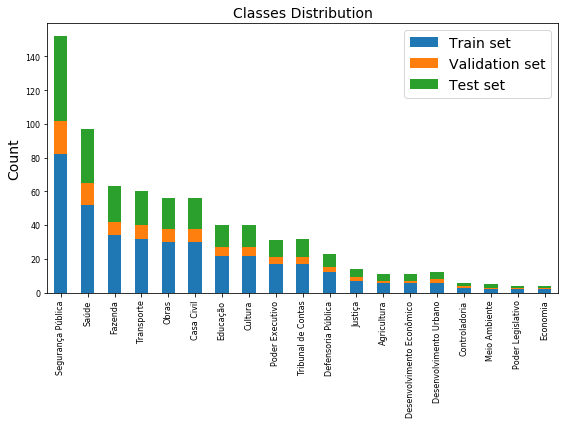

In [68]:
ax_classes = counts.plot(y=counts.columns, kind="bar",stacked=True, figsize=(8,6), fontsize=8)
ax_classes.legend(["Train set", "Validation set", "Test set"], prop={"size": 14})
ax_classes.set_ylabel("Count", size=14)
ax_classes.set_title("Classes Distribution", size=14)
plt.tight_layout()

# ax_classes.get_figure().savefig("plots/medium_theme_distribution.pdf")

In [69]:
ax_classes.get_figure().savefig("classes_distribution.pdf")